# Movie Database Analysis#

Required import statements

In [59]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data loading into dataframes

In [60]:
data_udata = pd.read_table('/home/user/Downloads/Movie lens/ml-100k/u.data', header = None, 
                           delim_whitespace=True)
data_udata.columns = ['User_id', 'Item ID', 'Rating', 'Timestamp']

data_uuser = pd.read_table('/home/user/Downloads/Movie lens/ml-100k/u.user', header = None, sep="|")
data_uuser.columns = ['User_id', 'Age', 'Gender', 'Profession','Zipcode']

data_uitem=pd.read_table('/home/user/Downloads/Movie lens/ml-100k/u.item', header = None, sep="|", 
                         encoding="ISO-8859-1")
data_uitem.columns = ['Item ID', 'movie_title', 'release_date', 'video_release_date', 'IMDb URL', 'unknown',
                    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 
                    'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'thriller', 
                    'War', 'Western']


## Part 1 ##

Grouping data by ID and counting the total rating 

In [63]:
final1 = data_udata.groupby('User_id').Rating.agg('count')


Plotting the histogram Age versus Count

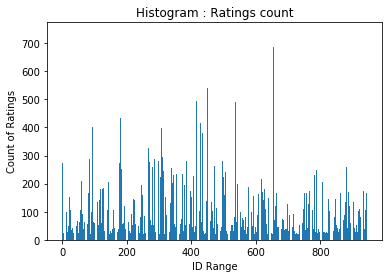

In [64]:
x = list(final1.index)
y = final1.tolist()
plt.bar(x,y)
plt.title('Histogram : Ratings count')
plt.ylabel('Count of Ratings')
plt.xlabel('ID Range')
plt.show()

## Part 2

Sorting data by age and counting the number of users in a particular age

In [65]:
final2 = data_uuser.groupby('Age').Age.agg('count') 

Plotting bar graph Age versus Count

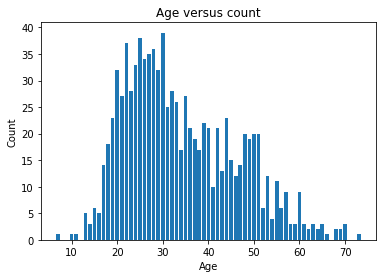

In [66]:
x = list(final2.index)
y = final2.tolist()
plt.bar(x,y)
plt.title('Age versus count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## Part3 

Dropping unnecessary columns and merging the dataframes for required dataset

In [67]:
temp1 = data_uitem
temp1.drop(['movie_title', 'release_date', 'video_release_date', 'IMDb URL'], axis=1, inplace=True)
temp = pd.merge(data_udata,data_uuser, on='User_id', how = 'outer')
temp.drop(['Rating','Timestamp', 'Age', 'Profession','Zipcode'], axis = 1, inplace = True)
final3 = pd.merge(temp, temp1, on = 'Item ID', how = 'outer')

Creating a new dataframe for obtaining final counts

In [68]:
rowname = ['Action', 'Adventure','Animation', 'Children', 'Comedy', 'Crime', 
         'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical',
         'Mystery', 'Romance', 'Sci-Fi', 'thriller', 'War', 'Western']
df= pd.DataFrame(index=rowname, columns=['M','F'])

Iterating through the dataframe for obtaining final counts

In [69]:
for l in range(len(rowname)):
    listf = final3.groupby('Gender')[rowname[l]].sum().tolist()
    df.loc[rowname[l]:, 'M'] = listf[0]
    df.loc[rowname[l]:, 'F'] = listf[1]

Plotting the stacked bar chart for final counts

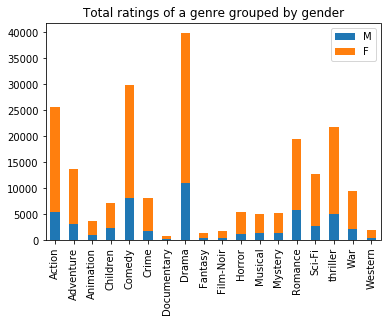

In [70]:
df.plot(title='Total ratings of a genre grouped by gender', kind = 'bar',stacked = True)